In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

'''
Use most frequently used 10000 words.
'''
max_features = 10000
maxlen = 500
batch_size = 32

# Load dataset from IMDB.
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

# Sample sequence padding
train_data = sequence.pad_sequences(train_data, maxlen=maxlen)
test_data =sequence.pad_sequences(test_data, maxlen=maxlen)

print('The shape of train data =', train_data.shape)
print('The shape of test data =', test_data.shape)

Using TensorFlow backend.


The shape of train data = (25000, 500)
The shape of test data = (25000, 500)


In [2]:
from keras import models
from keras import layers

# LSTM layers has 8320 weights.
# (num_input_features, output_features) = (32, 32)
# 4 gates(input_gate, output_gate, forget_gate, k_t gate) has 2 weight matrix(W, U)
# and 1 bias vector(b).
# 8320 = 4 * (2 * (32*32) + 32) = 4 * 2080 = 8320

model = models.Sequential()
model.add(layers.Embedding(input_dim=max_features, output_dim=32))
model.add(layers.LSTM(units=32))
model.add(layers.Dense(units=1, activation='sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [3]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [4]:
# 20% train samples are used for validation.
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.5006 - acc: 0.7651 - val_loss: 0.3323 - val_acc: 0.8730
Epoch 2/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2975 - acc: 0.8833 - val_loss: 0.2978 - val_acc: 0.8746
Epoch 3/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.2385 - acc: 0.9111 - val_loss: 0.3068 - val_acc: 0.8806
Epoch 4/10
20000/20000 [==============================] - 73s 4ms/step - loss: 0.2028 - acc: 0.9256 - val_loss: 0.2849 - val_acc: 0.8790
Epoch 5/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1742 - acc: 0.9367 - val_loss: 0.3433 - val_acc: 0.8814
Epoch 6/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1623 - acc: 0.9435 - val_loss: 0.3090 - val_acc: 0.8808
Epoch 7/10
20000/20000 [==============================] - 72s 4ms/step - loss: 0.1428 - acc: 0.9488 - val_loss: 0.3105 - val_acc:

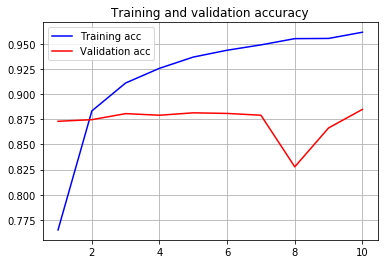

In [6]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = np.arange(len(acc)) + 1

plt.figure('Training and validation accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, color='b', label='Training acc')
plt.plot(epochs, val_acc, color='r', label='Validation acc')
plt.legend()
plt.grid()
plt.show()

# Validation accuracy is about 87%

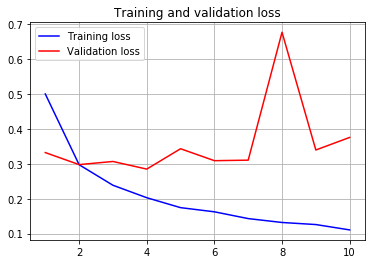

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure('Training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, color='b', label='Training loss')
plt.plot(epochs, val_loss, color='r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()